In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats as sp

## Description
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Objective
The objective of this work is to determine if reponse times are statistically different between the conguent and the incongruent groups.

## Data
first, the data is imported and shown in a table.

In [4]:
data = pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


## Variables and hypotheses

Since the study used the same subject for both experiments, we should use dependent statistical analysis to gain insight into the data. This is a benefit for us since we do not need many cases when we are dealing with dependent analysis.

### Variables
The dependent variable in this experiment is the number of seconds that it takes for the subject to finish the task of saying the ink colors. The independent variable is the type of condition congruent or incongruent.

### Hypothese
The null hypotheses in this analysis is that the type of condition (congruent or incongruent) does not have an effect on the reading time. The alternative hypothesis is that the mean of the congurent condition is less than the mean of incongruent condition.
\begin{align}
H_o & : \mu_c = \mu_i \\
H_a & : \mu_c < \mu_i \\
\mu_c & : congurent \\
\mu_i & : incongurent
\end{align}

### Type of analysis
Due to these facts:
- We have less than 30 samples.
- We don’t know the population's standard deviation.
- The analysis was done one the same subjects.

We assume that the distributions are Gaussian. Therefore, we will use a paired t_test and due to the hypothese we will use a one-sided t-test with alpha=0.025.

## Descriptive statistics

In [23]:
cong_mean = np.mean(data['Congruent'])
incong_mean = np.mean(data['Incongruent'])
cong_std = stat.stdev(data['Congruent'])
incong_std = stat.stdev(data['Incongruent'])
print ('Congurent mean is: ',cong_mean)
print ('Inongurent mean is: ',incong_mean)
print ('Congurent std is: ',cong_std)
print ('incongurent std is: ',incong_std)

Congurent mean is:  14.051125000000004
Inongurent mean is:  22.01591666666667
Congurent std is:  3.5593579576451955
incongurent std is:  4.7970571224691385


The mean time for the conguent samples is 14.05 s, while it is 22.02 s for the incongruent group. The sample standard deviation for the congruent condition is 3.56 s. The standard deviation of the incongruent condition is a bit higher at 4.80 s.

## Visualization

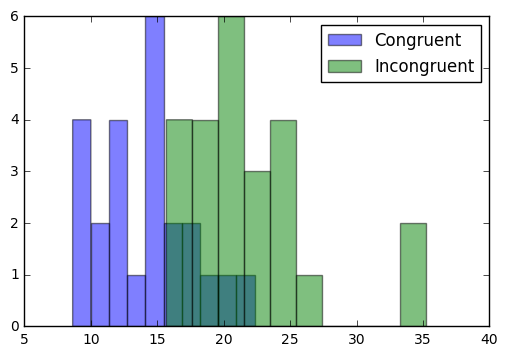

In [12]:
bins = 10
plt.hist(data['Congruent'],bins, alpha=0.5, label= 'Congruent')
plt.hist(data['Incongruent'],bins, alpha=0.5, label= 'Incongruent')
plt.legend(loc='upper right')
plt.show()

Based on the histograms the distribution seem to be a little positively skewed normla and there is a shift to longer times from congruent to incongruent conditions.

## Hypotheses testing

In [35]:
ttest = sp.ttest_rel(data['Congruent'], data['Incongruent'])
print (ttest)
conf_int = sp.t.interval(0.95, len(data['Congruent'])-1)
t_95 = conf_int[1]
diff = (data['Congruent']-data['Incongruent'])
diff_mean = np.mean(diff)
diff_std = stat.stdev(diff)
margin = t_95*(diff_std/len(data['Congruent']))
lower = diff_mean - margin
upper = diff_mean + margin
print (lower)
print (upper)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
-8.38411088381
-7.54547244952


Since the two groups are related we will use t_test for paired samples. The ttest shows that the t statistics is t(23) =-8.02, p=4.1e-08, two-sided. P-value is much lower than alpha at 0.025. Confidence interval on the mean difference; 95% CI=(-8.38,-7.54).

## Decision
Based on out statistical analysis we showed that the mean time between the congruent and the incongruent group are statistically different. Therefore, we reject the null hypotheses.